$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

In [8]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 
  
# data (as pandas dataframes) 
X = wholesale_customers.data.features 
Y = wholesale_customers.data.targets  
  
# variable information 
print(wholesale_customers.variables) 

{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': None, 'preprocessing_description':

In [58]:
X.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185


$\textbf{Correlation Plot}$
---

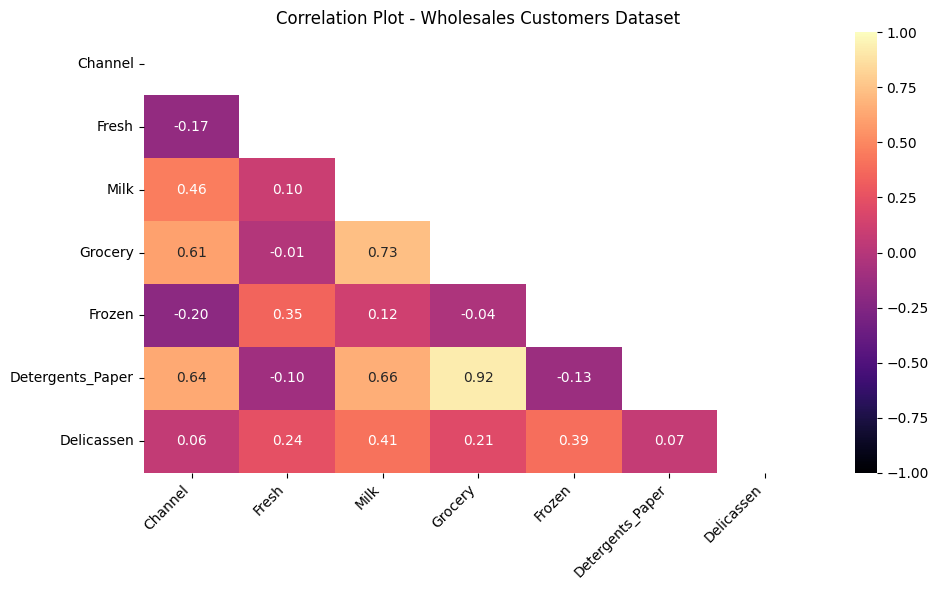

In [9]:
# --- CREATING A CORRELATION PLOT --- 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = X

# Calculate correlation matrix
correlation = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Plot correlation heatmap
plt.figure(figsize=(10, 6))

# Create a heatmap with color gradient and annotations
sns.heatmap(correlation, annot=True, cmap="magma", vmin=-1, vmax=1, fmt=".2f", mask=mask) 
plt.xticks(rotation=45, ha="right")
plt.title("Correlation Plot - Wholesales Customers Dataset")

# Show the plot
plt.tight_layout()
plt.show()

$\textbf{Distribution of Each Column}$
---

Best Fit Distribution for Channel: Gamma
Parameters: (0.10671303464344217, 0.9999999999999998, 0.20240662498606643)


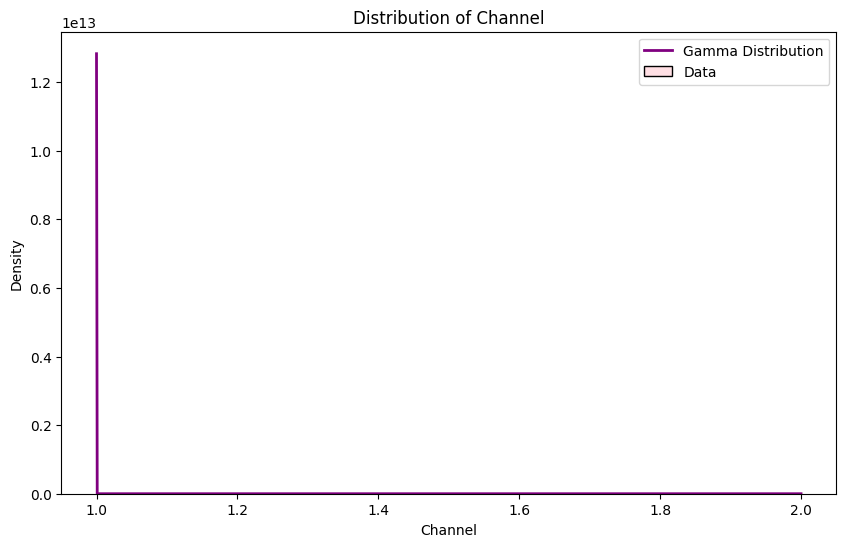

Best Fit Distribution for Fresh: Exponential
Parameters: (3.0, 11997.297727272728)


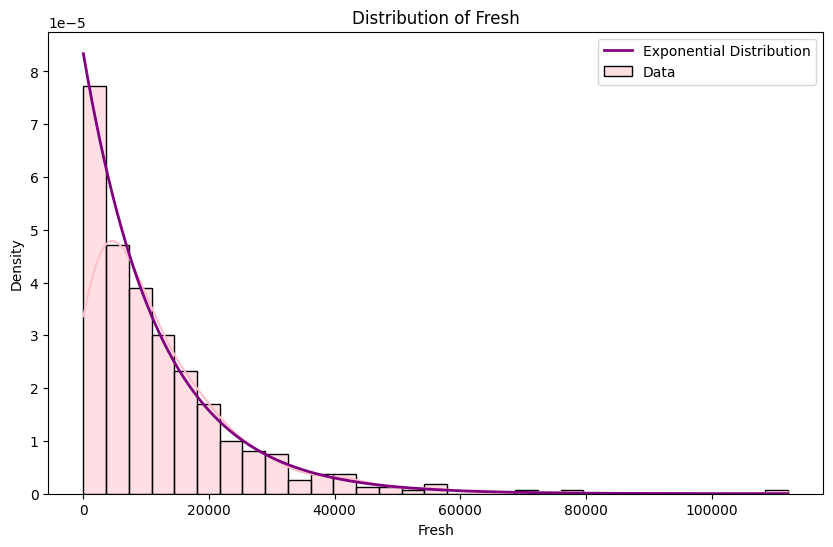

Best Fit Distribution for Milk: Exponential
Parameters: (55.0, 5741.265909090909)


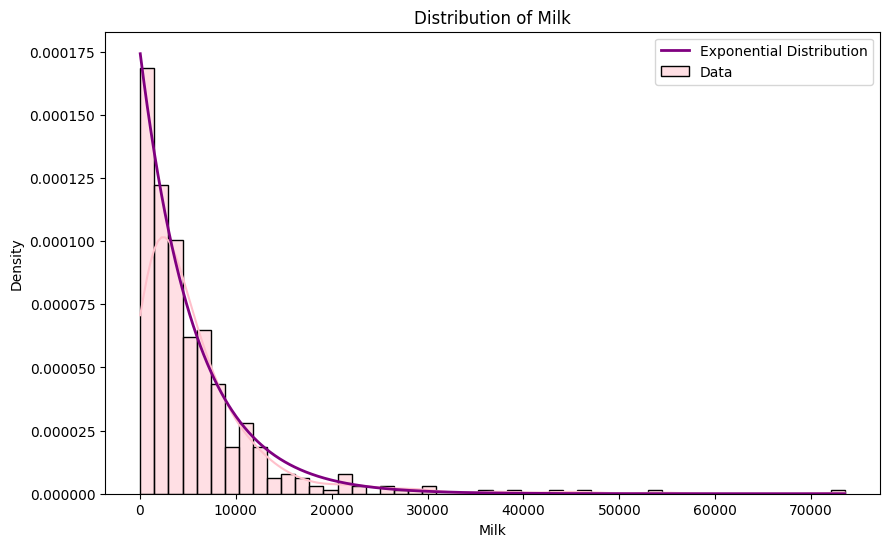

Best Fit Distribution for Grocery: Exponential
Parameters: (3.0, 7948.277272727273)


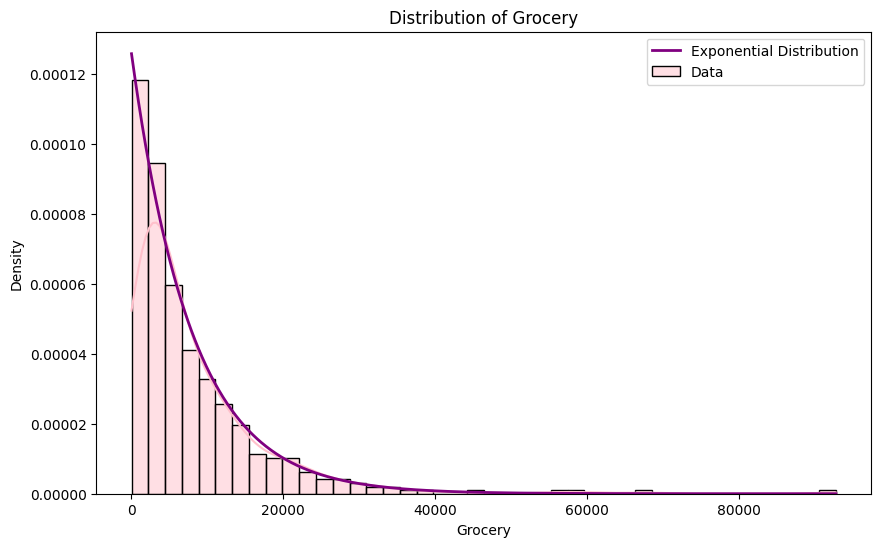

Best Fit Distribution for Frozen: Exponential
Parameters: (25.0, 3046.931818181818)


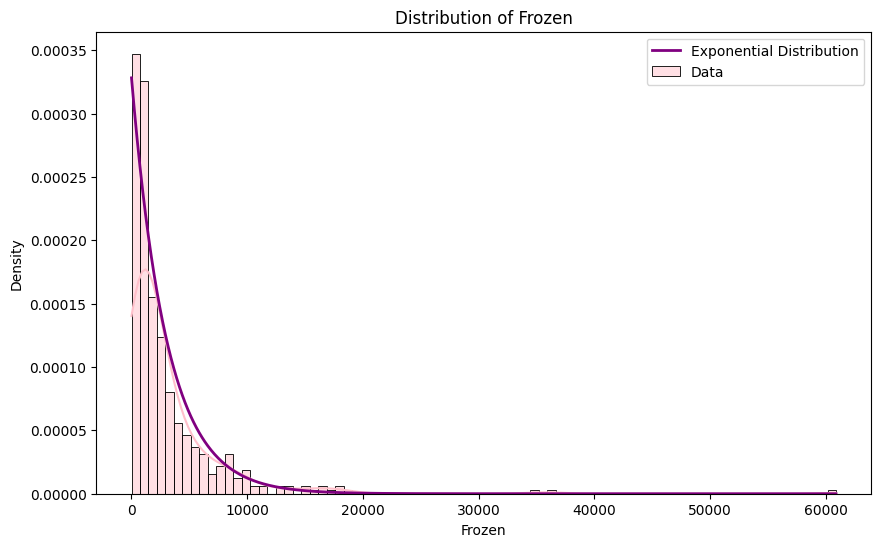

Best Fit Distribution for Detergents_Paper: Gamma
Parameters: (0.5638431412435174, -0.6439123158260127, 4521.424560950092)


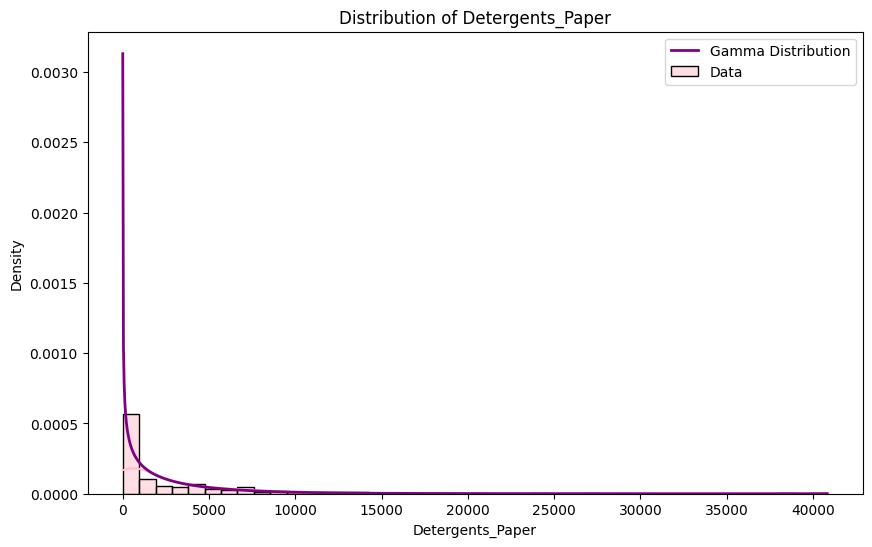

Best Fit Distribution for Delicassen: Exponential
Parameters: (3.0, 1521.8704545454545)


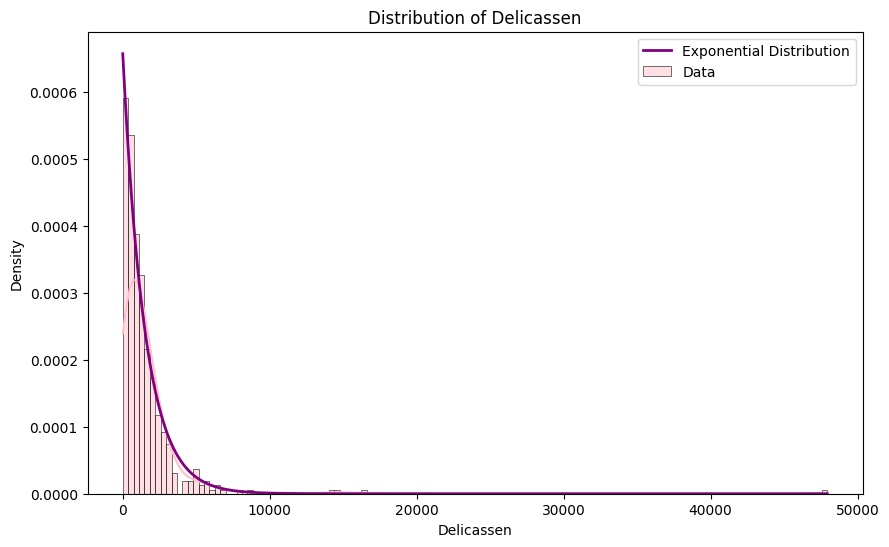

In [29]:
# --- PROBABILITY DISTRIBUTION CLASSIFICATION ---
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 

# Data (as pandas dataframes) 
X = wholesale_customers.data.features 
Y = wholesale_customers.data.targets 

data = pd.concat([X, Y], axis=1)

# Define the distributions
distributions = {
    "Uniform": stats.uniform,
    "Gamma": stats.gamma,
    "Exponential": stats.expon,
}

# Fit distributions to each column and determine the best fit
best_fit_results = {}
for col_name, col_data in X.items():
    results = {}
    for dist_name, dist in distributions.items():
        # Fit the distribution
        params = dist.fit(col_data)
        
        # Calculate the likelihood
        ll = np.sum(dist.logpdf(col_data, *params))
        
        # Store results
        results[dist_name] = {
            "params": params,
            "log_likelihood": ll
        }
    
    # Determine the best fit for this column
    best_fit = max(results, key=lambda x: results[x]["log_likelihood"])
    best_fit_results[col_name] = {
        "best_fit": best_fit,
        "params": results[best_fit]["params"]
    }

# Visualize results
for col_name, result in best_fit_results.items():
    print(f"Best Fit Distribution for {col_name}: {result['best_fit']}")
    print(f"Parameters: {result['params']}")
    
    # Plot the data and the fitted distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col_name], kde=True, stat="density", color="pink", label="Data")
    x = np.linspace(min(data[col_name]), max(data[col_name]), 1000)
    dist = distributions[result['best_fit']]
    y = dist.pdf(x, *result['params'])
    plt.plot(x, y,color='purple', linestyle='-', lw=2, label=result['best_fit'] + " Distribution")
    plt.title(f"Distribution of {col_name}")
    plt.xlabel(col_name)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


$\textbf{Summary Of Statistics}$
---

In [33]:
# --- SUMMARY STATISTICS ---
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
wholesale_customers = fetch_ucirepo(id=292) 

# Data (as pandas dataframes) 
X = wholesale_customers.data.features 
Y = wholesale_customers.data.targets 

data = pd.concat([X, Y], axis=1) 

# Generate summary statistics
summary_statistics = X.describe()

# Print summary statistics
print(summary_statistics)

          Channel          Fresh          Milk       Grocery        Frozen  \
count  440.000000     440.000000    440.000000    440.000000    440.000000   
mean     1.322727   12000.297727   5796.265909   7951.277273   3071.931818   
std      0.468052   12647.328865   7380.377175   9503.162829   4854.673333   
min      1.000000       3.000000     55.000000      3.000000     25.000000   
25%      1.000000    3127.750000   1533.000000   2153.000000    742.250000   
50%      1.000000    8504.000000   3627.000000   4755.500000   1526.000000   
75%      2.000000   16933.750000   7190.250000  10655.750000   3554.250000   
max      2.000000  112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.

$\textbf{Hypothesis Test}$
---
$\textbf{The Correlation Between Grocery and Channels}$
- Null Hypothesis (H0): There is no significant difference in the spending on Grocery products between the two channels (Channel 1 and Channel 2).
- Alternative Hypothesis (H1): There is a significant difference in the spending on Grocery products between the two channels (Channel 1 and Channel 2).

In [10]:
import pandas as pd
from scipy.stats import ttest_ind

data = X.dropna(subset=['Grocery', 'Channel'])

channel_1_grocery = df[df['Channel'] == 1]['Grocery']
channel_2_grocery = df[df['Channel'] == 2]['Grocery']

# Perform a t-test
t_stat, p_value = ttest_ind(channel_1_grocery, channel_2_grocery, equal_var=False)

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference in the spending on Grocery products between the two channels.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference in the spending on Grocery products between the two channels.")

T-statistic: -11.775037432327998
P-value: 3.623878362357236e-23
Reject the null hypothesis (H0): There is a significant difference in the spending on Grocery products between the two channels.
